In [1]:
import pandas as pd
import numpy as np
import random as rand

from PIL import Image, ImageStat
from os.path import exists

In [2]:
def get_icon_from_item(item):
    filename = path_grid_icons + item['id'] + filename_ending_grid_icon
    if exists(filename):
        return np.asarray(Image.open(filename))
    else:
        print(f"File {filename} does not exist.")
    return []

def get_rand_item_slot():
    global all_items_df
    
    icon = []
    while len(icon) == 0:
        index = rand.randrange(len(all_items_df)) # TODO change
        item = all_items_df.iloc[index]
        icon = get_icon_from_item(item)
    
    w_index = rand.randrange(item['width'])
    h_index = rand.randrange(item['height'])
    slot_width = (int) (item['icon_width'])
    slot_height = (int) (item['icon_height'])
    
    subicon = icon[h_index*slot_height:(h_index+1)*slot_height, w_index*slot_width:(w_index+1)*slot_width]
    return index,subicon
    
def get_feature_from_img(img):
    width = img.shape[1]
    height = img.shape[0]
    r = 0;
    g = 0;
    b = 0;
    for x in range(width):
        for y in range(height):
            r += (icon[y][x])[0]
            g += (icon[y][x])[1]
            b += (icon[y][x])[2]
    r = (int) (r / (width*height))
    g = (int) (g / (width*height))
    b = (int) (b / (width*height))
    return (r,g,b)

In [3]:
# paths
path_icons = './icons/'
path_data = './data/'
path_grid_icons = './grid_icons/'

filename_ending_grid_icon = '-grid-image.jpg'

In [4]:
# load data from csv
all_items_df = pd.read_csv(path_data + 'all_items.csv')
feature_dict = pd.read_csv(path_data + 'all_features.csv')

In [13]:
# get random icon
true_index,icon = get_rand_item_slot()
feature = get_feature_from_img(icon)

# create voting vector
voting = []
for i in range(len(all_items_df)):
    voting.append(0)
    
# vote
for c in feature:
#     print(c)
    li = (feature_dict.iloc[c]['features']).strip('][').split(', ')
    for index in li:
        voting[int(index)] += 1

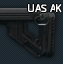

In [14]:
Image.fromarray(icon)

In [15]:
feature_dict.iloc[100]['features']

'[119, 290, 491, 492, 644, 945, 1126, 1242, 1367, 1373, 1385, 1410, 1433, 1710, 1722, 2096, 2253, 2500, 2703, 2711]'

In [16]:
index = 0
value = 0
total = 0
for i in range(len(voting)):
    if voting[i] == value:
        total += 1
    if voting[i] > value:
        index = i
        value = voting[i]
        
print(f"Predicted index {index} with voting {value}, ")
print(f"True index is {true_index}")

Predicted index 19 with voting 3
True index is 1042
